# Step 1: Importing required libraries..

In [1]:
# importing libraries..

import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from pandas import Series

import warnings
warnings.filterwarnings('ignore')

# Step 2: Dataset Structure & content..

In [2]:
#!pip install xlrd ......for excel file reading

In [3]:
data = pd.read_excel('CocaCola_Sales_Rawdata.xlsx')

In [4]:
data.head(10)

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [5]:
# checking shape of the data rows & columns
data.shape

(42, 2)

In [6]:
# checking datatypes..
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [7]:
data_new = data.copy()

In [8]:
data_new.isna().sum()

Quarter    0
Sales      0
dtype: int64

In [9]:
data_new.drop_duplicates().shape

(42, 2)

In [10]:
data_new.index = data_new.Quarter

In [11]:
data_new.drop(['Quarter'], axis=1, inplace=True)

In [12]:
data_new.head()

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996


In [13]:
data_new.tail()

,Sales
Quarter,
Q2_95,4936.0
Q3_95,4895.0
Q4_95,4333.0
Q1_96,4194.0
Q2_96,5253.0


In [14]:
# Adding quarter dat column in data_new

data_new['date'] = pd.date_range(start='1/1/1986', periods=len(data_new), freq='Q')

In [15]:
data_new.head()

,Sales,date
Quarter,,
Q1_86,1734.827000,1986-03-31
Q2_86,2244.960999,1986-06-30
Q3_86,2533.804993,1986-09-30
Q4_86,2154.962997,1986-12-31
Q1_87,1547.818996,1987-03-31


In [16]:
# resetting index of data_new & dropping Date collumn

data_new.index = data_new.date

In [17]:
data_new.head()

,Sales,date
date,,
1986-03-31,1734.827000,1986-03-31
1986-06-30,2244.960999,1986-06-30
1986-09-30,2533.804993,1986-09-30
1986-12-31,2154.962997,1986-12-31
1987-03-31,1547.818996,1987-03-31


In [18]:
data_new['month'] = data_new.date.dt.month
data_new['year'] = data_new.date.dt.year

# Step 3: EDA

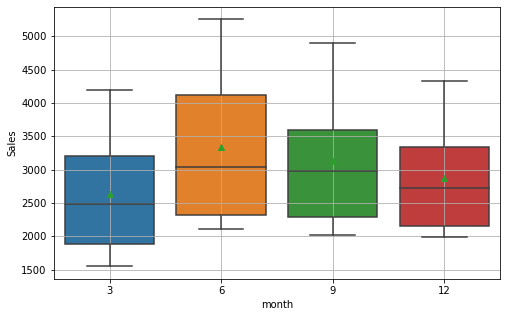

In [19]:
plt.figure(figsize=(8,5))
sns.boxplot(data_new.month, data_new.Sales, showmeans=True)
plt.grid()
plt.show()

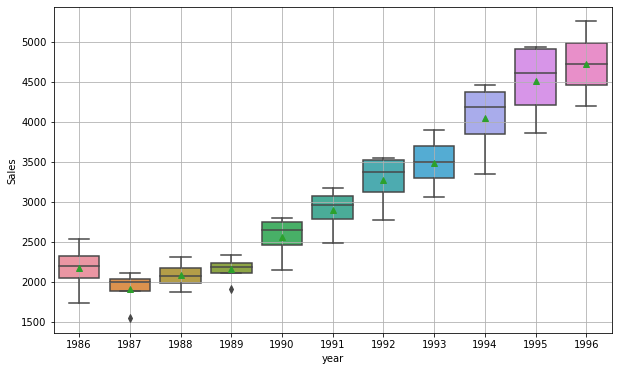

In [20]:
plt.figure(figsize=(10,6))
sns.boxplot(data_new.year, data_new.Sales, showmeans= True)
plt.grid()
plt.show()

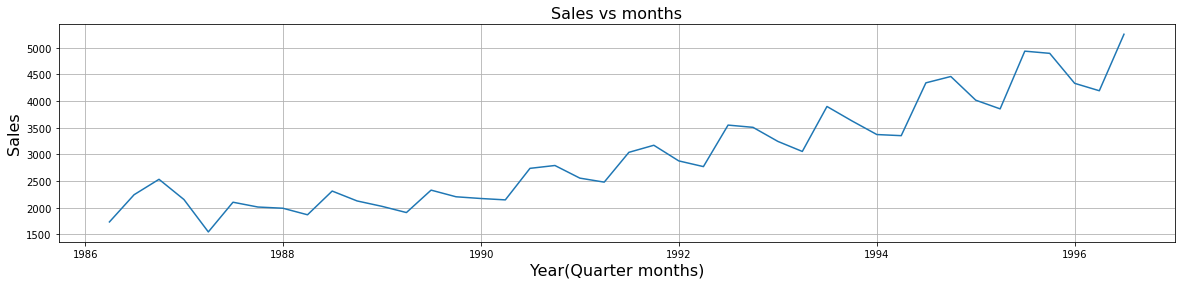

In [21]:
# checking no. relation between of Sales w.r.t time
fontdict={'fontsize':16}
plt.figure(figsize=(20,4))
sns.lineplot(x='date', y='Sales', data=data_new)
plt.xlabel('Year(Quarter months)', fontdict=fontdict)
plt.ylabel('Sales', fontdict)
plt.title('Sales vs months', fontdict)
plt.grid()
plt.show()

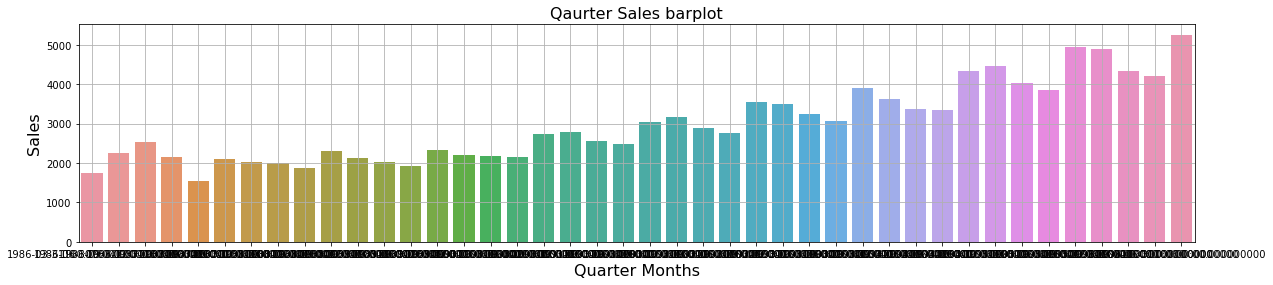

In [22]:
# checking no. relation between of Sales w.r.t time
fontdict={'fontsize':16}
plt.figure(figsize=(20,4))
sns.barplot(x='date', y='Sales', data=data_new)
plt.xlabel('Quarter Months', fontdict)
plt.ylabel('Sales', fontdict)
plt.title('Qaurter Sales barplot', fontdict)
plt.grid()
plt.show()

# Step 4: Model techniques & Evalutions..

In [23]:
DataNEW = data_new.drop(['date'], axis=1)

In [24]:
train = DataNEW[0:33]   # 80% of total resampled train_data day basis =>0.8*42 i.e. no.of rows

valid =DataNEW[33:]     # 20% of total resampled train_data day basis =>0.2*42 i.e. no.of rows

In [25]:
train.shape, valid.shape

((33, 3), (9, 3))

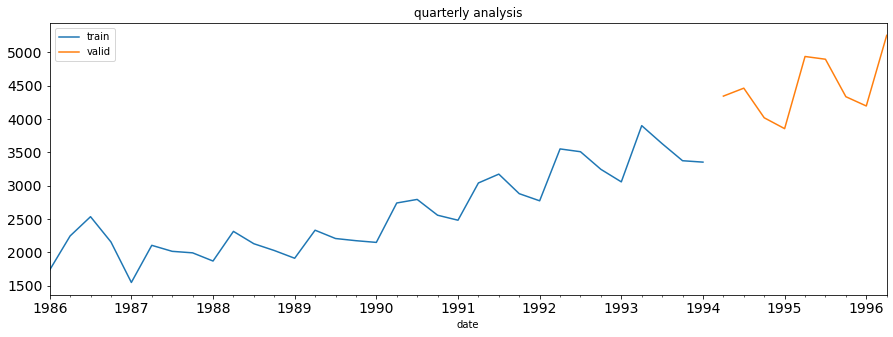

In [26]:
# lets have a look how test & valid datasets are divided..

train.Sales.plot(figsize=(15,5), title='quarterly analysis', fontsize=14, label='train' )
valid.Sales.plot(figsize=(15,5), title='quarterly analysis', fontsize=14, label='valid' )
plt.legend()
plt.show()

# Step 5: Statestical methods of time sereis forecasting..!
***

In [27]:
method = []
RMSE = []

## 5.1 statistical approach..

### Method 1: Navie Approach..

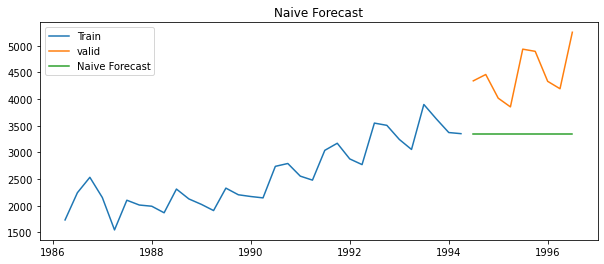

In [28]:
# creating naive dataset..

y_hat = valid.copy()              # creating valid dataset copy
dd= np.asarray(train.Sales)  # Naive is the previous value for next new prediction. 
                                  # ....So last Sales count will be predicted as new value.
y_hat['naive'] = dd[len(dd)-1]    # this will be the last Sales value from train data will 
                                  # ...be assigned in y_hat naive column

plt.figure(figsize=(10,4))

plt.plot(train.index, train['Sales'], label='Train')
plt.plot(valid.index,valid['Sales'], label='valid')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [29]:
dd= np.asarray(train.Sales)

In [30]:
train.tail(1)    # last row from train data

,Sales,month,year
date,,,
1994-03-31,3352.0,3,1994


In [31]:
valid.head(1)     # first row from valid data set

,Sales,month,year
date,,,
1994-06-30,4342.0,6,1994


In [32]:
y_hat.head(1)   # first row from y_hat data set

,Sales,month,year,naive
date,,,,
1994-06-30,4342.0,6,1994,3352.0


In [33]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms1 = sqrt(mean_squared_error(valid.Sales, y_hat.naive))
print(rms1)

1205.5077768309916


In [34]:
RMSE.append(rms1)
method.append('Navie Approach')

We can infer from the RMSE value and the graph above, that Naive method isn’t suited for datasets with high variability. It is best suited for stable datasets. We can still improve our score by adopting different techniques. 

### Method 2: Simple Average method

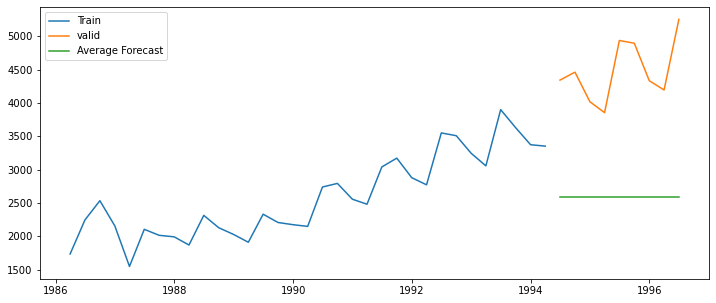

In [35]:
y_hat_avg = valid.copy()
y_hat_avg['avg_forecast'] = train['Sales'].mean()
plt.figure(figsize=(12,5))
plt.plot(train['Sales'], label='Train')
plt.plot(valid['Sales'], label='valid')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()


In [36]:
rms2 = sqrt(mean_squared_error(valid.Sales, y_hat_avg.avg_forecast))
print(rms2)


1935.4953691906815


In [37]:
RMSE.append(rms2)
method.append('Simple Average method')

* Simple avarage method model did'nt improved RMSE score.

### Method 3: Moving Average method

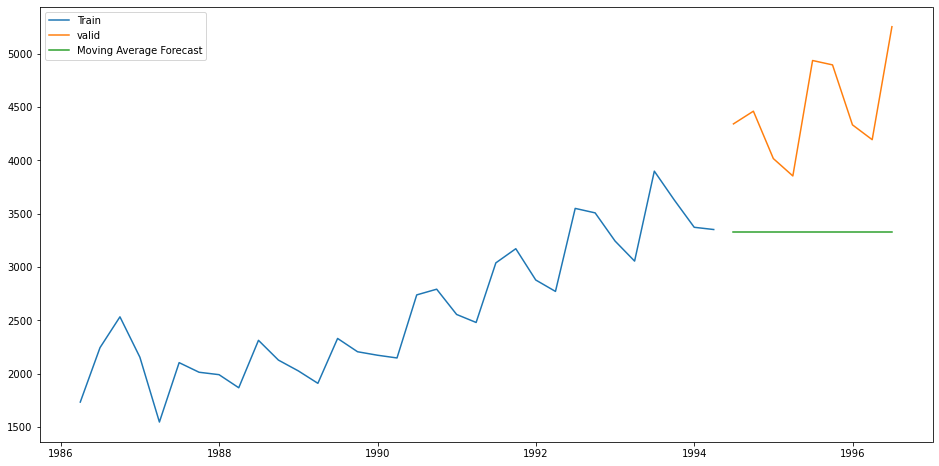

In [38]:
y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast'] = train['Sales'].rolling(10).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(train['Sales'], label='Train')
plt.plot(valid['Sales'], label='valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [39]:
rms3 = sqrt(mean_squared_error(valid.Sales, y_hat_avg.moving_avg_forecast))
print(rms3)

1229.614062539967


In [40]:
RMSE.append(rms3)
method.append('moving avarage method')

* moving avarage method model did'nt improved RMSE score.

### Method 4: Simple Exponetial smoothing

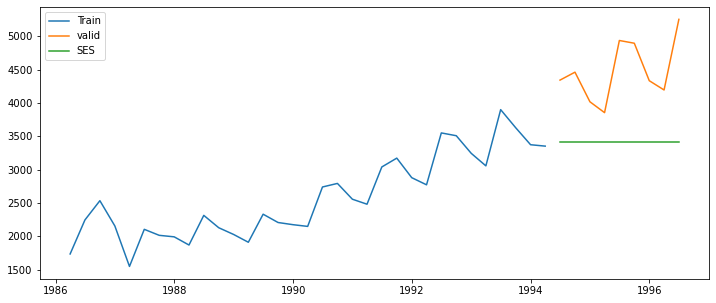

In [41]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

y_hat_avg = valid.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['Sales'])).fit(smoothing_level=0.5,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(valid))
plt.figure(figsize=(12,5))
plt.plot(train['Sales'], label='Train')
plt.plot(valid['Sales'], label='valid')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [42]:
rms4 = sqrt(mean_squared_error(valid.Sales, y_hat_avg.SES))
print(rms4)

1146.8423967215863


In [43]:
RMSE.append(rms4)
method.append('simple exponetial smoothing method')

* simple exponetial smoothing method model did'nt improved RMSE score.

### Method 5 – Holt’s Linear Trend method

Each Time series dataset can be decomposed into it’s componenets which are Trend, Seasonality and Residual. Any dataset that follows a trend can use Holt’s linear trend method for forecasting.

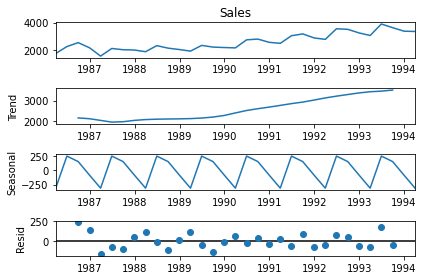

In [44]:
import statsmodels.api as sm

sm.tsa.seasonal_decompose(train.Sales).plot()
result = sm.tsa.stattools.adfuller(train.Sales)
plt.show()

We can see from the graphs obtained that this dataset follows an increasing trend. Hence we can use Holt’s linear trend to forecast the future prices.

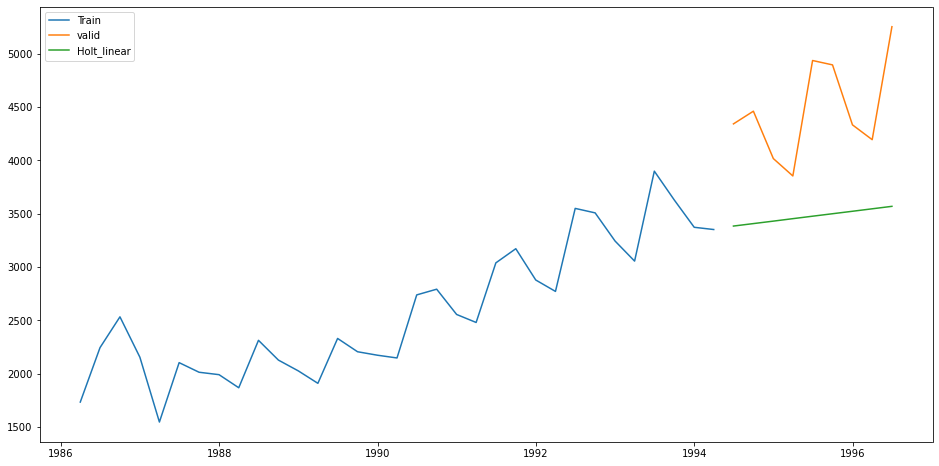

In [45]:
y_hat_avg = valid.copy()


fit1 = Holt(np.asarray(train['Sales'])).fit(smoothing_level = 0.9,smoothing_slope = 0.15)
y_hat_avg['Holt_linear'] = fit1.forecast(len(valid))

plt.figure(figsize=(16,8))
plt.plot(train['Sales'], label='Train')
plt.plot(valid['Sales'], label='valid')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [46]:
 y_hat_avg.head()

,Sales,month,year,Holt_linear
date,,,,
1994-06-30,4342.0,6,1994,3384.526620
1994-09-30,4461.0,9,1994,3407.626400
1994-12-31,4017.0,12,1994,3430.726180
1995-03-31,3854.0,3,1995,3453.825960
1995-06-30,4936.0,6,1995,3476.925739


In [47]:
rms5 = sqrt(mean_squared_error(valid.Sales, y_hat_avg.Holt_linear))
print(rms5)

1080.9116691888225


In [48]:
RMSE.append(rms5)
method.append('Holt’s Linear Trend method')

We can see that this method maps the trend accurately and hence provides a better solution when compared with above models. We can still tune the parameters to get even a better model.

### Method 6 – Holt-Winters Method

C:\Users\SHRIKANT\ANACONDA_NEW\envs\python3.8.0\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  warnings.warn('No frequency information was'


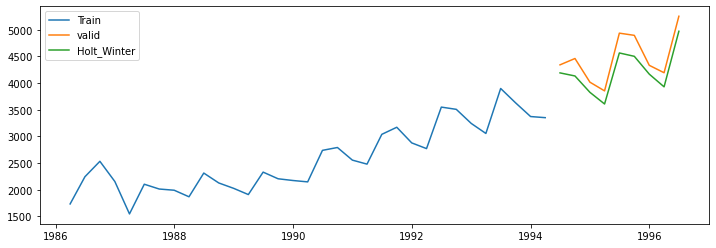

In [49]:
y_hat_avg = valid.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=4 ,dates=train.index,trend='mul',seasonal='mul',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(valid))
plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(valid['Sales'], label='valid')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [50]:
rms6 = sqrt(mean_squared_error(valid.Sales, y_hat_avg.Holt_Winter))
print(rms6)

277.94818702746716


In [51]:
RMSE.append(rms6)
method.append('Holt-Winters method')

## Method 7 – ARIMA(Autoregressive Integrated Moving average)
***

 #### Step I     : Visualize the time Series
 
 #### Step II   : Stationarize the Series.
 
 #### Step III  : Plot ACF/PACF charts & Find optimal parameters
 
 #### Step IV  : Build ARIMA model.
 
 #### Step V  : Make Predictions

 ### Parameter tuning for ARIMA model...
 
 * Dicky fuller test to check stationarity of time series
 * Intuition: How strongly a time series is a defined by a trend
 
 
 
 * Null hypothesis: time series is not stationary (has some time depedent structure)
 * Alternative hypothesis : time series is stationary

 ## Step I: Check the stationarity...
***

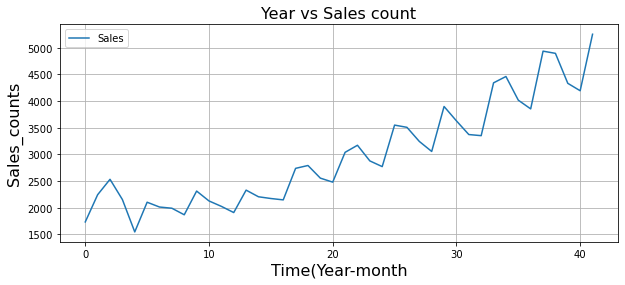

In [52]:
# lets recheck stationarity of the train data...

fontdict={'fontsize':16}
fig, ax = plt.subplots(1,1,figsize=(10,4))
data.plot(ax=ax)
plt.xlabel('Time(Year-month', fontdict)
plt.ylabel('Sales_counts', fontdict)
plt.title('Year vs Sales count', fontdict)
plt.grid()
plt.show()

# we already concluded that time sereis is non-stationary in nature. But we can reconfirm technically 
#...before applying ARIMA since it is the step in ARIMA process

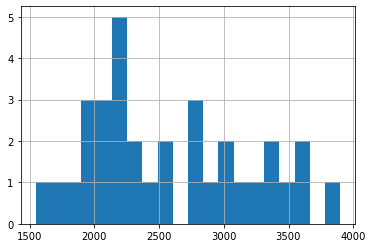

In [53]:
plt.hist(train.Sales, bins=20)
plt.grid()
plt.show()

We can clearly see that the mean and variance for Sales count over the period in changing 

In [54]:
# spilling the main data into two portions & checking the mean & variance is approx same or not..!
# this will clearly help in to decide data is staionary or no.

X = data.Sales
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

if mean1==mean2 and var1==var2:
    print('Data time series is STATIONARY..!!')
else:
    print('*'*50)
    print("Data time series is 'NOT STATIONARY..!!'")
    print('*'*50)
# we can see that the mean & variance of data is not same

mean1=2190.682807, mean2=3798.023809
variance1=97608.117624, variance2=506545.822521
**************************************************
Data time series is 'NOT STATIONARY..!!'
**************************************************


In [55]:
 ### Short Notes/Concept of ACF & PACF...
    
# this below codes are studied just before applying stationarize concept on model.
# ACF & PACF will be helpful during ARIMA....
# So below codes are written for study purpose

 #### Note: ACF & PACF concept
 
 We can assume the distribution of each variable fits a Gaussian (bell curve) distribution. If this is the case, we can use the Pearson’s correlation coefficient to summarize the correlation between the variables.

The Pearson’s correlation coefficient is a number between -1 and 1 that describes a negative or positive correlation respectively. A value of zero indicates no correlation.

We can calculate the correlation for time series observations with observations with previous time steps, called lags. Because the correlation of the time series observations is calculated with values of the same series at previous times, this is called a serial correlation, or an autocorrelation.
    

 #### ACF PLot:
 
 A plot of the autocorrelation of a time series by lag is called the AutoCorrelation Function, or the acronym ACF. This plot is sometimes called a correlogram or an autocorrelation plot
 
 
 ACF is an (complete) auto-correlation function which gives us values of auto-correlation of any series with its lagged values. We plot these values along with the confidence band and tada! We have an ACF plot. In simple terms, it describes how well the present value of the series is related with its past values. A time series can have components like trend, seasonality, cyclic and residual. ACF considers all these components while finding correlations hence it’s a ‘complete auto-correlation plot’.

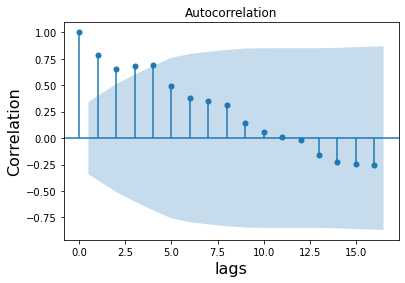

In [56]:
# Plot the autocorrelation function
# Plots lags on the horizontal and the correlations on vertical axis.

from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(train.Sales)       # bydefault all lags considered here (use shift+tab for parameters)
plt.xlabel('lags', fontdict)
plt.ylabel('Correlation', fontdict)
pyplot.show()


# In brief the cone shape is confidence interval 95% for no correlartion of time sereis component.
#......the lags on outside of this cone(confidence interval) are correlated to each other.
# Here we can say that upto lag no. 3 there is correlation issue.
# Hence the time series ins no-stationary

 #### PACF Plot:
    
    The partial autocorrelation at lag k is the correlation that results after removing the effect of any correlations due to the terms at shorter lags.
    
PACF is a partial auto-correlation function. Basically instead of finding correlations of present with lags like ACF, it finds correlation of the residuals (which remains after removing the effects which are already explained by the earlier lag(s)) with the next lag value hence ‘partial’ and not ‘complete’ as we remove already found variations before we find the next correlation. So if there is any hidden information in the residual which can be modeled by the next lag, we might get a good correlation and we will keep that next lag as a feature while modeling. Remember while modeling we don’t want to keep too many features which are correlated as that can create multicollinearity issues. Hence we need to retain only the relevant features.

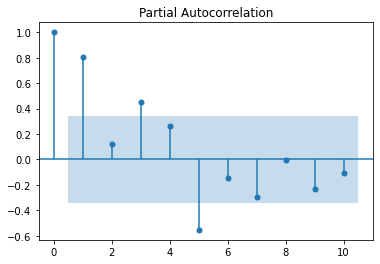

In [57]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf
series = (train.Sales)
plot_pacf(series,lags=10)
pyplot.show()

# PCAF is next on ACF version that help to avoid noise, or avoid predefined correlation lags. 
#..And it gives clearly that at how many lags there is actual correlation problem

# Here we can say taht upto lag=1 there is correleation. 
# But the lag no. 13 is also beyond the acceptance range that means time series is non-stationary

 ## Stationarity check using Dickey fuller method..

* ### Null Hypothesis (H0): if p-value > 0.05. Time Series is non-stationary & has time depedent structure 
    * If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.


* ### Alternate Hypothesis (H1): <= 0.05. Time sereis is stationary & don't have time depedent structure 
    * The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.


In [58]:
# dickey fuller test to check stationarity of the timeseries...

def adfuller_test(data):
    
    '''
    it takes one column dataset with Datatime index format.
    and compairs ADF test result to critical value probability
    & returns result statements..!
    '''
    from statsmodels.tsa.stattools import adfuller
    X = data.values
    result = adfuller(X)
    
    print('ADF Statistic:{}'.format(result[0].round(2)))
    print('*'*70)
    if result[1]>0.05:
        print('p-value:{}>0.05..Hence{}'.format(result[1].round(2),', NON-STATIONARY' ))
    else:
        print('p-value:{}<0.05..Hence{}'.format(result[1].round(2),', STATIONARY' ))  
    print('*'*70)
    
    print('Critical Values:')
    for key, value in result[4].items():
        if result[0]>value:
            print('{}: {} <less than {}'.format(key, value.round(3), 'ADF_Stat....Hence NON-STATIONARY'))
            
        else:
            print('{}:{} >greater than{}'.format(key, value.round(3), 'ADF_Stat....Hence STATIONARY'))
    

# if we comare ADF statistics to critical values. 
#.......1) since ADF Statistics value is greater than Critical values
#.......2) p-value > 0.05
# Hence time series is non-stationary.we need to make it stationary

In [59]:
adfuller_test(data.Sales)

ADF Statistic:1.31
**********************************************************************
p-value:1.0>0.05..Hence, NON-STATIONARY
**********************************************************************
Critical Values:
1%: -3.639 <less than ADF_Stat....Hence NON-STATIONARY
5%: -2.951 <less than ADF_Stat....Hence NON-STATIONARY
10%: -2.614 <less than ADF_Stat....Hence NON-STATIONARY


 ## Step II: Stationarize the series
 ***

How to make time series stationary..?
***

* 1. Differencing the Series (once or more)
* 2. Take the log of the series
* 3. Take the nth root of the series
* 4. Combination of the above

* 5. Eliminating trend
* 6. Eliminating seasonability

Why make a non-stationary series stationary before forecasting?
***


* Forecasting a stationary series is relatively easy and the forecasts are more reliable.


* An important reason is, autoregressive forecasting models are essentially linear regression models that utilize the lag(s) of the series itself as predictors.


* We know that linear regression works best if the predictors (X variables) are not correlated against each other. So, stationarizing the series solves this problem since it removes any persistent autocorrelation, thereby making the predictors(lags of the series) in the forecasting models nearly independent.

##  Removing trend..
 ***

lets understand first...What is trend..?

*  Trend is varying in mean over time.

#### method 1: Transformation...

One of the first tricks to reduce trend can be transformation.penalize higher values more than smaller values. 

These can be taking...
* log, 
* square root, 
* cube root, etc. 

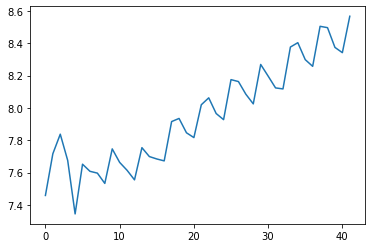

In [60]:
data_log = np.log(data.Sales)
plt.plot(data_log)
plt.show()

In this simpler case, it is easy to see a forward trend in the data. But its not very intuitive in presence of noise. So we can use some techniques to estimate or model this trend and then remove it from the series. There can be many ways of doing it and some of most commonly used are:

* Aggregation – taking average for a time period like monthly/weekly averages
* Smoothing – taking rolling averages
* Polynomial Fitting – fit a regression model

### moving average method.

In [61]:
# Note: using smoothing tech. i.e moving average method..

train_log =np.log(train.Sales)
valid_log = np.log(valid.Sales)

In [62]:
# 12 means we are considering last 1 year i.e for last 12 months avg. for evry next year..

moving_avg = train_log.rolling(12).mean()
moving_std = train_log.rolling(12).std()

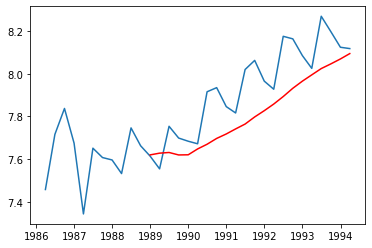

In [63]:
plt.plot(train_log)
plt.plot(moving_avg, color='red')
plt.show()

The red line shows the rolling mean. Lets subtract this from the original series. Note that since we are taking average of last 12 values, rolling mean is not defined for first 11 values. This can be observed as:

In [64]:
train_log_moving_avg_diff = train_log - moving_avg
train_log_moving_avg_diff.head(12)

date
1986-03-31         NaN
1986-06-30         NaN
1986-09-30         NaN
1986-12-31         NaN
1987-03-31         NaN
1987-06-30         NaN
1987-09-30         NaN
1987-12-31         NaN
1988-03-31         NaN
1988-06-30         NaN
1988-09-30         NaN
1988-12-31   -0.006306
Name: Sales, dtype: float64

In [65]:
# drop NaN...since we have taken window as 12. so at every 12th frequency the average of 
#......last 12 value(including value place also) will be displayed.

train_log_moving_avg_diff.dropna(inplace=True)

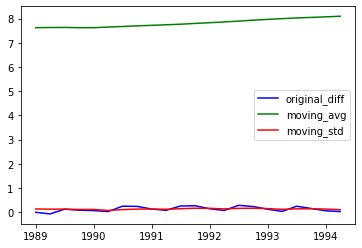

In [66]:
original = plt.plot(train_log_moving_avg_diff, color='blue', label='original_diff')
avg = plt.plot(moving_avg, color='green', label='moving_avg')
std =plt.plot(moving_std, color='red', label='moving_std')
plt.legend(loc='best')
plt.show(block=False)

In [67]:
# rechecking stationarity test...

adfuller_test(train_log_moving_avg_diff)

ADF Statistic:-2.57
**********************************************************************
p-value:0.1>0.05..Hence, NON-STATIONARY
**********************************************************************
Critical Values:
1%: -3.924 <less than ADF_Stat....Hence NON-STATIONARY
5%: -3.068 <less than ADF_Stat....Hence NON-STATIONARY
10%: -2.674 <less than ADF_Stat....Hence NON-STATIONARY


Since time series still non-stationary. Will go for another method

### exponentially weighted moving average

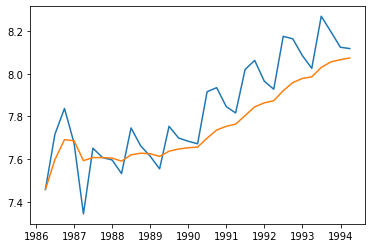

In [68]:
expwighted_avg = train_log.ewm(span=12).mean()
plt.plot(train_log)
plt.plot(expwighted_avg)
plt.show()

In [69]:
train_log_ewma_diff = train_log - expwighted_avg
adfuller_test(train_log_ewma_diff)

ADF Statistic:-2.15
**********************************************************************
p-value:0.22>0.05..Hence, NON-STATIONARY
**********************************************************************
Critical Values:
1%: -3.711 <less than ADF_Stat....Hence NON-STATIONARY
5%: -2.981 <less than ADF_Stat....Hence NON-STATIONARY
10%: -2.63 <less than ADF_Stat....Hence NON-STATIONARY


* If we observe clearly the ADF statistic is close to -2.592 & somewhat near to -2.909 that we can take approx at 90% confidence level. which is better than previous model

## Eliminating Trend and Seasonality:

The simple trend reduction techniques discussed before don’t work in all cases, particularly the ones with high seasonality. Lets discuss two ways of removing trend and seasonality:

* Differencing – taking the differece with a particular time lag
* Decomposition – modeling both trend and seasonality and removing them from the model.

* Differencing
***

One of the most common methods of dealing with both trend and seasonality is differencing. In this technique, we take the difference of the observation at a particular instant with that at the previous instant. This mostly works well in improving stationarity.

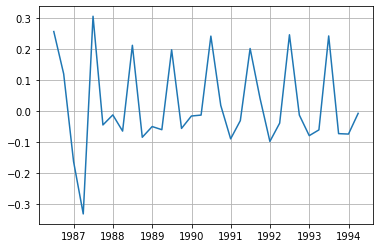

In [70]:
train_log_diff = train_log - train_log.shift()
plt.plot(train_log_diff)
plt.grid()
plt.show()

# pandas shift by defalut=1
#...for example: before shift [1,2,3] & after shift [NaN,1,2]
# pandas shift details:https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html

This appears to have reduced trend considerably. Lets verify using our plots:

In [71]:
train_log_diff.dropna(inplace=True)
adfuller_test(train_log_diff)

ADF Statistic:-4.4
**********************************************************************
p-value:0.0<0.05..Hence, STATIONARY
**********************************************************************
Critical Values:
1%:-3.711 >greater thanADF_Stat....Hence STATIONARY
5%:-2.981 >greater thanADF_Stat....Hence STATIONARY
10%:-2.63 >greater thanADF_Stat....Hence STATIONARY


* This is also not improved quite similar to log diff. we can take second & third order log diff. 

 * Decomposing
***

In this approach, both trend and seasonality are modeled separately and the remaining part of the series is returned.

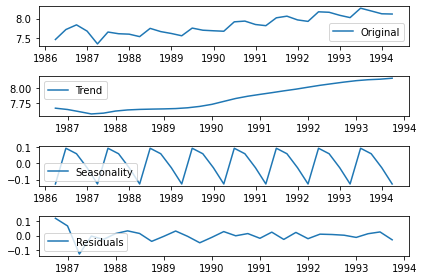

In [72]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(train_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(train_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


Here we can see that the trend, seasonality are separated out from data and we can model the residuals. Lets check stationarity of residuals:

In [73]:
train_log_decompose = residual
train_log_decompose.dropna(inplace=True)
adfuller_test(train_log_decompose)

ADF Statistic:-5.23
**********************************************************************
p-value:0.0<0.05..Hence, STATIONARY
**********************************************************************
Critical Values:
1%:-3.711 >greater thanADF_Stat....Hence STATIONARY
5%:-2.981 >greater thanADF_Stat....Hence STATIONARY
10%:-2.63 >greater thanADF_Stat....Hence STATIONARY


Finally time series become stationary..!!

### Forecasting a Time Series

* Number of AR (Auto-Regressive) terms (p): AR terms are just lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).


* Number of MA (Moving Average) terms (q): MA terms are lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.


* Number of Differences (d): These are the number of nonseasonal differences, i.e. in this case we took the first order difference. So either we can pass that variable and put d=0 or pass the original variable and put d=1. Both will generate same results.


An importance concern here is how to determine the value of ‘p’ and ‘q’. We use two plots to determine these numbers. Lets discuss them first.

* Autocorrelation Function (ACF): It is a measure of the correlation between the the TS with a lagged version of itself. For instance at lag 5, ACF would compare series at time instant ‘t1’…’t2’ with series at instant ‘t1-5’…’t2-5’ (t1-5 and t2 being end points).


* Partial Autocorrelation Function (PACF): This measures the correlation between the TS with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons. Eg at lag 5, it will check the correlation but remove the effects already explained by lags 1 to 4.

 ### Ways to plot ACF & PACF

In [74]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(train_log_diff, nlags=14)
lag_pacf = pacf(train_log_diff, nlags=14, method='ols')

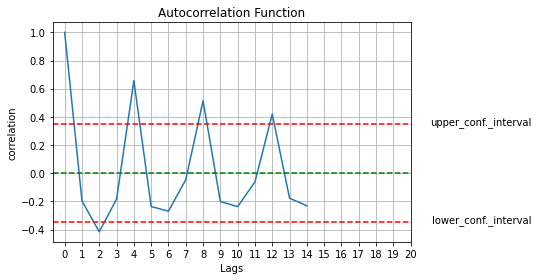

In [75]:
#Plot ACF:
fig, ax1 = plt.subplots(1,1,figsize=(8,4))
ax1 = plt.plot(lag_acf)
ax1 = plt.axhline(y=0,linestyle='--',color='green',)

ax1 = plt.axhline(y=-1.96/np.sqrt(len(train_log_diff)),linestyle='--',color='red')
ax1 = plt.text(27, -1.96/np.sqrt(len(train_log_diff)),'lower_conf._interval', horizontalalignment='right')

ax1 = plt.axhline(y=1.96/np.sqrt(len(train_log_diff)),linestyle='--',color='red')
ax1 = plt.text(27, 1.96/np.sqrt(len(train_log_diff)),'upper_conf._interval', horizontalalignment='right')
ax1 = plt.title('Autocorrelation Function')
plt.xticks(range(0,21))
plt.xlabel('Lags')
plt.ylabel('correlation')
plt.grid()
ax1 = plt.tight_layout()

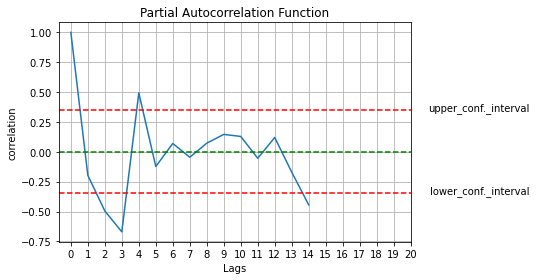

In [76]:
#Plot PACF:
fig, ax1 = plt.subplots(1,1,figsize=(8,4))
ax1 = plt.plot(lag_pacf)
ax1 = plt.axhline(y=0,linestyle='--',color='green',)

ax1 = plt.axhline(y=-1.96/np.sqrt(len(train_log_diff)),linestyle='--',color='red')
ax1 = plt.text(27, -1.96/np.sqrt(len(train_log_diff)),'lower_conf._interval', horizontalalignment='right')

ax1 = plt.axhline(y=1.96/np.sqrt(len(train_log_diff)),linestyle='--',color='red')
ax1 = plt.text(27, 1.96/np.sqrt(len(train_log_diff)),'upper_conf._interval', horizontalalignment='right')
ax1 = plt.title('Partial Autocorrelation Function')
plt.xticks(range(0,21))
plt.xlabel('Lags')
plt.ylabel('correlation')
plt.grid()
ax1 = plt.tight_layout()

 * Simple & Direct way to plot ACF & PACF..
 ****

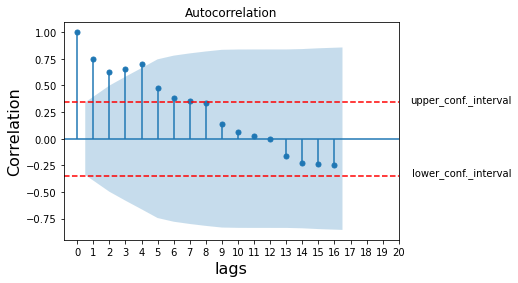

In [77]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(train_log)       # bydefault all lags considered here (use shift+tab for parameters)
plt.xlabel('lags', fontdict)
ax1 = plt.axhline(y=-1.96/np.sqrt(len(train_log_diff)),linestyle='--',color='red')
ax1 = plt.axhline(y=1.96/np.sqrt(len(train_log_diff)),linestyle='--',color='red')
ax1 = plt.text(27, 1.96/np.sqrt(len(train_log_diff)),'upper_conf._interval', horizontalalignment='right')
ax1 = plt.text(27, -1.96/np.sqrt(len(train_log_diff)),'lower_conf._interval', horizontalalignment='right')

plt.ylabel('Correlation', fontdict)
plt.xticks(range(0,21))
pyplot.show()

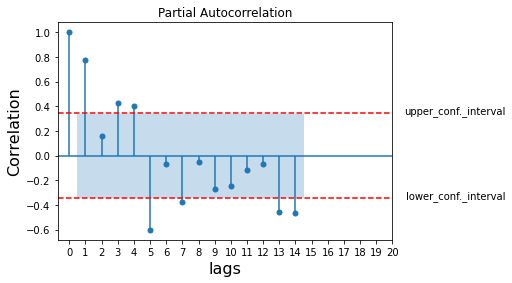

In [78]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(train_log, lags=14)       # bydefault all lags considered here (use shift+tab for parameters)
plt.xlabel('lags', fontdict)
ax1 = plt.axhline(y=-1.96/np.sqrt(len(train_log_diff)),linestyle='--',color='red')
ax1 = plt.axhline(y=1.96/np.sqrt(len(train_log_diff)),linestyle='--',color='red')
ax1 = plt.text(27, 1.96/np.sqrt(len(train_log_diff)),'upper_conf._interval', horizontalalignment='right')
ax1 = plt.text(27, -1.96/np.sqrt(len(train_log_diff)),'lower_conf._interval', horizontalalignment='right')
plt.ylabel('Correlation', fontdict)
plt.xticks(range(0,21))
pyplot.show()

From ACF & PACF plot we can determine p & q values..

In this plot, the two dotted lines on either sides of 0 are the confidence interevals. These can be used to determine the ‘p’ and ‘q’ values as:

 * p – The lag value where the PACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case p=1.

 * q – The lag value where the ACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case q=1.

 ### ARIMA Model:

In [79]:
from statsmodels.tsa.arima_model import ARIMA

C:\Users\SHRIKANT\ANACONDA_NEW\envs\python3.8.0\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  warnings.warn('No frequency information was'
C:\Users\SHRIKANT\ANACONDA_NEW\envs\python3.8.0\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  warnings.warn('No frequency information was'


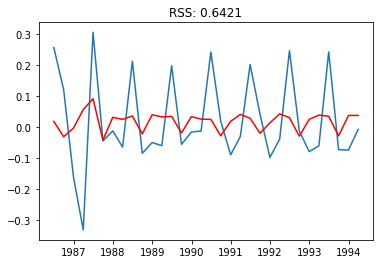

In [80]:
# AR Model:

model = ARIMA(train_log, order=(1, 1, 0))  # put q =1...in(p,d,q)
results_AR = model.fit(disp=-1)  
plt.plot(train_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-train_log_diff)**2))
plt.show()

C:\Users\SHRIKANT\ANACONDA_NEW\envs\python3.8.0\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  warnings.warn('No frequency information was'
C:\Users\SHRIKANT\ANACONDA_NEW\envs\python3.8.0\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  warnings.warn('No frequency information was'
C:\Users\SHRIKANT\ANACONDA_NEW\envs\python3.8.0\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


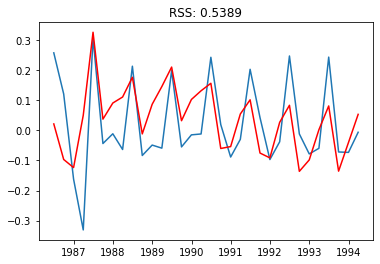

In [81]:
# MA model:

model = ARIMA(train_log, order=(0, 1, 1)) 
results_AR = model.fit(disp=-1)  
plt.plot(train_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-train_log_diff)**2))
plt.show()

C:\Users\SHRIKANT\ANACONDA_NEW\envs\python3.8.0\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  warnings.warn('No frequency information was'
C:\Users\SHRIKANT\ANACONDA_NEW\envs\python3.8.0\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  warnings.warn('No frequency information was'


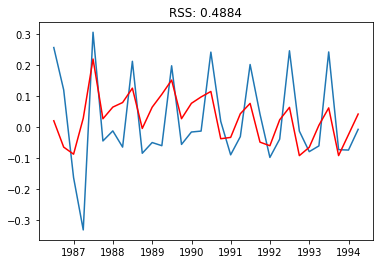

In [82]:
model = ARIMA(train_log, order=(1, 1, 1))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(train_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-train_log_diff)**2))
plt.show()

Here we can see that the AR and MA models have almost the same RSS but combined is significantly better. 

 ### Taking it back to original scale

Since the combined model gave best result, lets scale it back to the original values and see how well it performs there. First step would be to store the predicted results as a separate series and observe it.

In [83]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

date
1986-06-30    0.021393
1986-09-30   -0.063627
1986-12-31   -0.086454
1987-03-31    0.029634
1987-06-30    0.220687
dtype: float64

In [84]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

date
1986-06-30    0.021393
1986-09-30   -0.042234
1986-12-31   -0.128688
1987-03-31   -0.099054
1987-06-30    0.121634
dtype: float64

In [85]:
# taking exponetial so that we can get actual values..
def predict(data):
    predictions_ARIMA_log = pd.Series(data, index=data.index)
    predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
    predictions_ARIMA = np.exp(predictions_ARIMA_log)
    preicted_df = pd.DataFrame(predictions_ARIMA, columns=['arima_predicted'])
    return preicted_df 

In [86]:
rms7 = sqrt(mean_squared_error(train.Sales, predict(train_log)))
print(rms7)

3985.789695095699


In [87]:
RMSE.append(rms7)
method.append('ARIMA method')

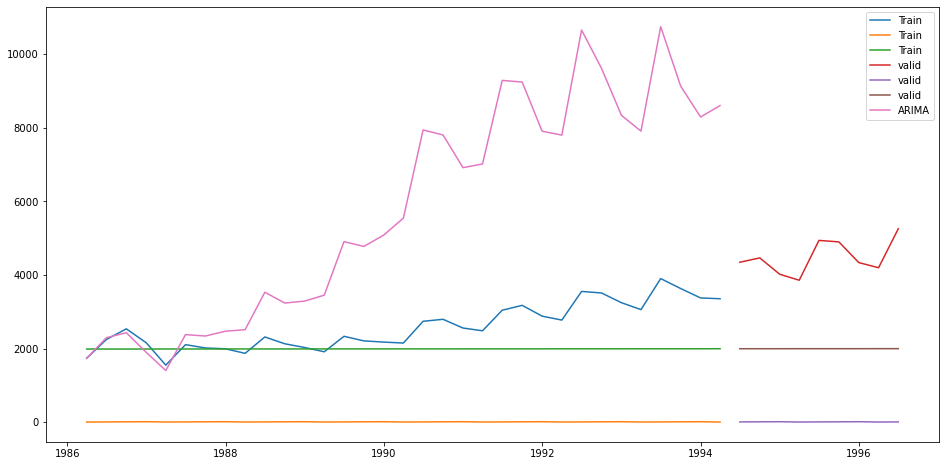

In [88]:
plt.figure(figsize=(16,8))
plt.plot(train, label='Train')
plt.plot(valid, label='valid')
plt.plot(predict(train_log), label='ARIMA')
plt.legend(loc='best')
plt.show()

* ARIMA Model is having very high RMSE

# Conlusion:

In [89]:
result_dict = dict(zip(method,RMSE))

In [90]:
summary = pd.DataFrame.from_dict(result_dict, orient='index', columns=['RMSE']).sort_values(by='RMSE', ascending=False )

In [91]:
summary

,RMSE
ARIMA method,3985.789695
Simple Average method,1935.495369
moving avarage method,1229.614063
Navie Approach,1205.507777
simple exponetial smoothing method,1146.842397
Holt’s Linear Trend method,1080.911669
Holt-Winters method,277.948187


In [92]:
def highlight_min(s):
    '''
    highlight the minimum in a Series yellow.
    '''
    is_min = s == s.min()
    return ['background-color: yellow' if v else '' for v in is_min]

In [93]:
summary.style.apply(highlight_min)

,RMSE
ARIMA method,3985.789695
Simple Average method,1935.495369
moving avarage method,1229.614063
Navie Approach,1205.507777
simple exponetial smoothing method,1146.842397
Holt’s Linear Trend method,1080.911669
Holt-Winters method,277.948187


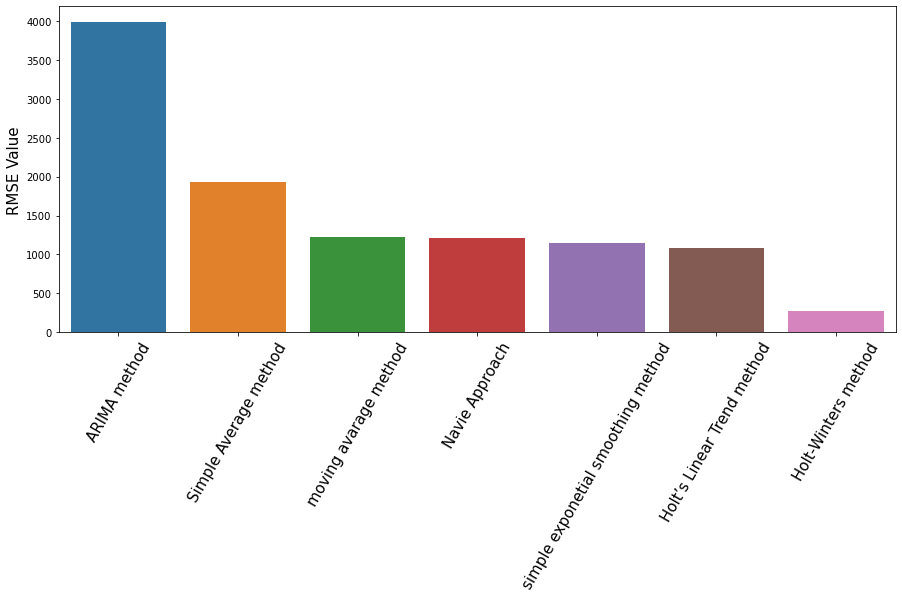

In [94]:
plt.figure(figsize=(15,6))
sns.barplot(summary.index, summary.RMSE)
plt.xticks(rotation=60, fontsize=15)
plt.ylabel('RMSE Value', fontsize=15)
plt.show()